In [1]:
import numpy as np
import pandas as pd
import math

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#merge all ckt cut out put files

all_ckt_files = glob.glob(os.path.join('ckt_output', 'exp_*.csv'))

ckt_df = pd.concat((pd.read_csv(f) for f in all_ckt_files), ignore_index=True)
ckt_df

,n,p,seed,Max Qubit Count,Partition Method,Partition Runtime,CKT Runtime,Sampling Overhead,Circuit Reload Time
0,10,0.2,3552,5,spectral-clustering,0.074619,0.006377,8.100000e+01,0.085190
1,10,0.2,3552,5,kmeans,0.003902,0.008993,3.486784e+09,0.085190
2,10,0.2,3552,5,agglom,0.001093,0.009914,2.824295e+11,0.085190
3,10,0.2,3552,3,spectral-clustering,0.100768,0.007049,6.561000e+03,0.061289
4,10,0.2,3552,3,kmeans,0.005256,0.009802,2.824295e+11,0.061289
5,10,0.2,3552,3,agglom,0.001203,0.010605,2.824295e+11,0.061289


In [4]:
#create n*p and log(sampling overhead) columns

ckt_df['np']  = ckt_df['n']*ckt_df['p']
ckt_df['so_log'] = ckt_df['Sampling Overhead'].apply(lambda x:math.log(x))
ckt_df.head(2)

,n,p,seed,Max Qubit Count,Partition Method,Partition Runtime,CKT Runtime,Sampling Overhead,Circuit Reload Time,np,so_log
0,10,0.2,3552,5,spectral-clustering,0.074619,0.006377,8.100000e+01,0.08519,2.0,4.394449
1,10,0.2,3552,5,kmeans,0.003902,0.008993,3.486784e+09,0.08519,2.0,21.972246


### np vs. sampling overhead

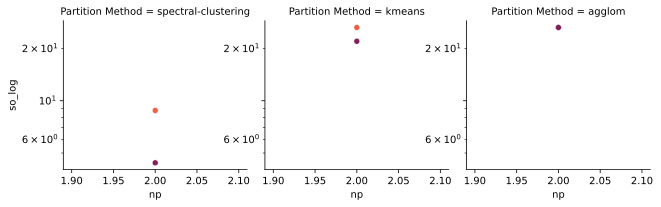

In [5]:
#np vs. Sampling Overhead

g = sns.FacetGrid(ckt_df, col='Partition Method',hue="Max Qubit Count",
                  palette='rocket_r',sharex='col', col_wrap=3)#, )#, row='Max Qubit Count')

g.map(sns.scatterplot, 'np','so_log',)
plt.yscale('log')



/Users/hema/opt/anaconda3/envs/CC/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


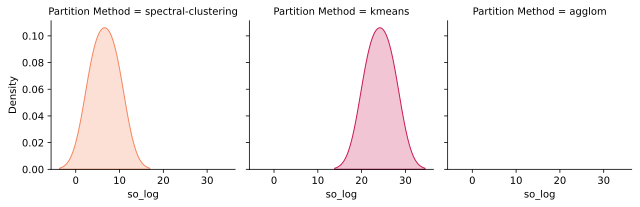

In [6]:
#kde plot
g = sns.FacetGrid(ckt_df, col='Partition Method',hue="Partition Method",
                 palette='rocket_r',sharex='col', col_wrap=3)#, )#, row='max_cluster_size')

g.map(sns.kdeplot,'so_log', fill=True,levels=8)

### Runtime plots

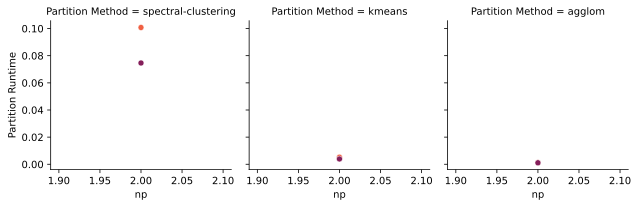

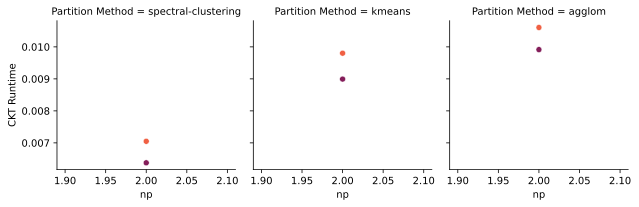

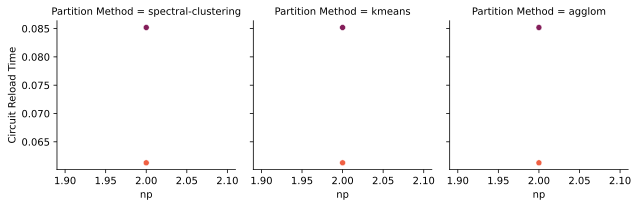

In [7]:
#Runtime plots
#facetgrid for each of the runtime

g = sns.FacetGrid(ckt_df, col='Partition Method',hue="Max Qubit Count", 
                  palette='rocket_r',sharex='col', col_wrap=3)#, row='Max Qubit Count')

g.map(sns.scatterplot, 'np','Partition Runtime',)
#plt.yscale('log')

g = sns.FacetGrid(ckt_df, col="Partition Method", hue='Max Qubit Count', 
                  palette='rocket_r',sharex='col', col_wrap=3,)# row='max_cluster_size')

g.map(sns.scatterplot, 'np','CKT Runtime',)
#plt.yscale('log')

g = sns.FacetGrid(ckt_df, col="Partition Method", hue='Max Qubit Count', 
                  palette='rocket_r',sharex='col', col_wrap=3,)# row='max_cluster_size')
g.map(sns.scatterplot, 'np','Circuit Reload Time',)
